In [ ]:
import pandas as pd

# Load the dataset (you can specify the path to your file)
df = pd.read_csv('C:/Users/Siva/Downloads/Pizza_Sale - pizza_sales.csv')

df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce', format='mixed')
df.dropna()
df.info()
df.dropna()

In [3]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')


Duplicates: 0


In [5]:
import pandas as pd

# Remove special characters
df['pizza_ingredients'] = df['pizza_ingredients'].str.replace(r'[^a-zA-Z\s]', '', regex=True)




In [27]:
# Convert order_date and order_time to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time


C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


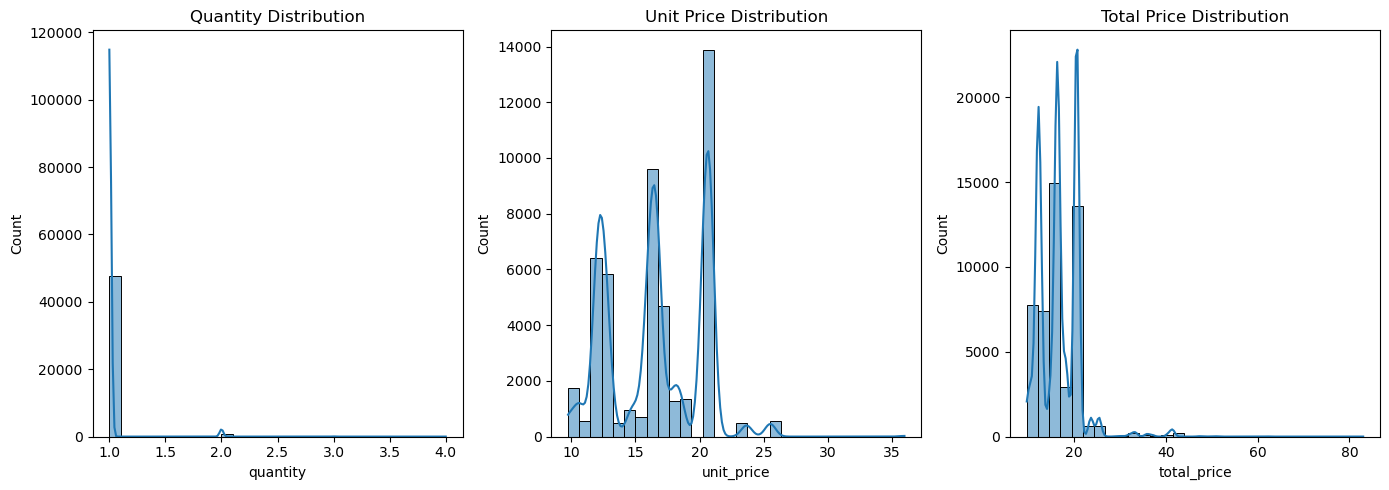

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['unit_price'], bins=30, kde=True)
plt.title('Unit Price Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['total_price'], bins=30, kde=True)
plt.title('Total Price Distribution')

plt.tight_layout()
plt.show()


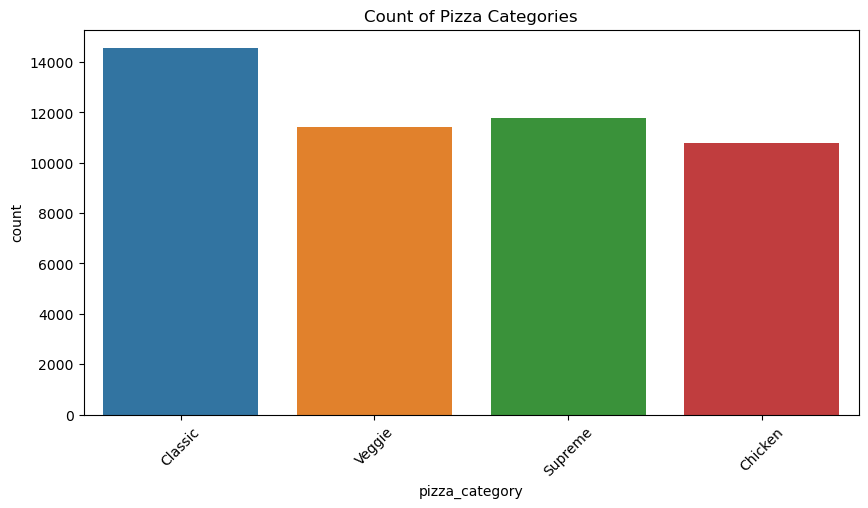

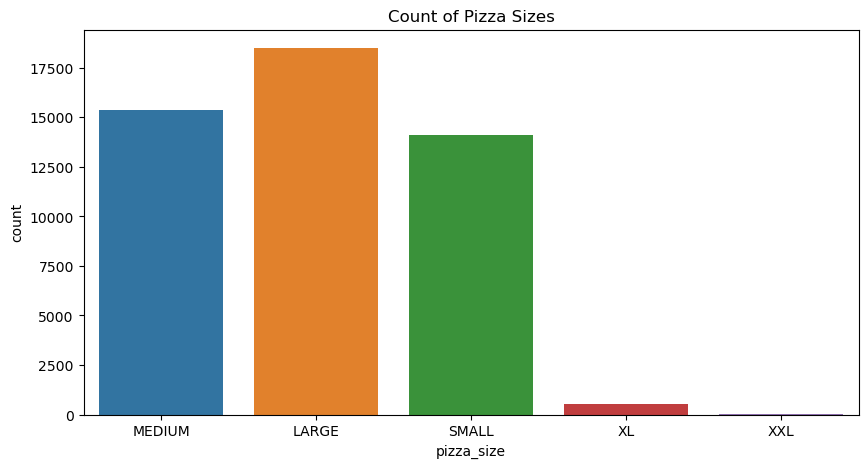

In [9]:
# Countplot for pizza categories
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='pizza_category')
plt.title('Count of Pizza Categories')
plt.xticks(rotation=45)
plt.show()

# Countplot for pizza sizes
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='pizza_size')
plt.title('Count of Pizza Sizes')
plt.show()


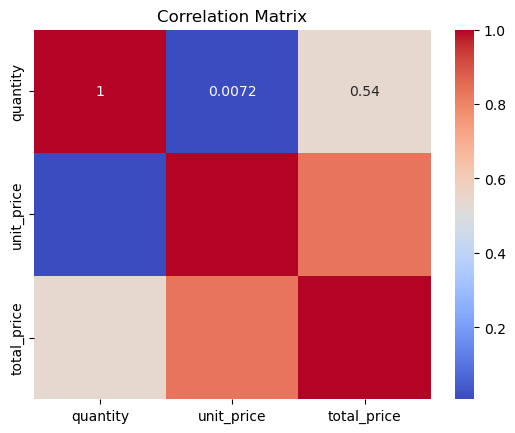

In [11]:
# Correlation matrix
corr_matrix = df[['quantity', 'unit_price', 'total_price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


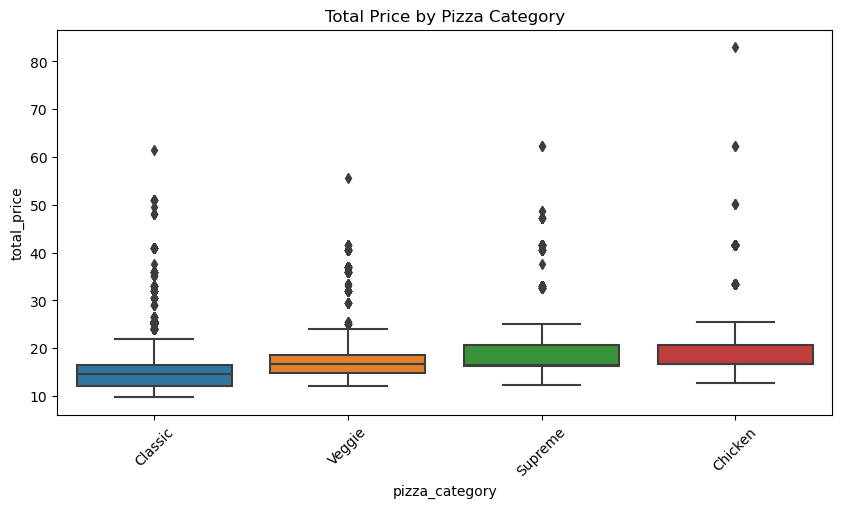

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='pizza_category', y='total_price')
plt.title('Total Price by Pizza Category')
plt.xticks(rotation=45)
plt.show()


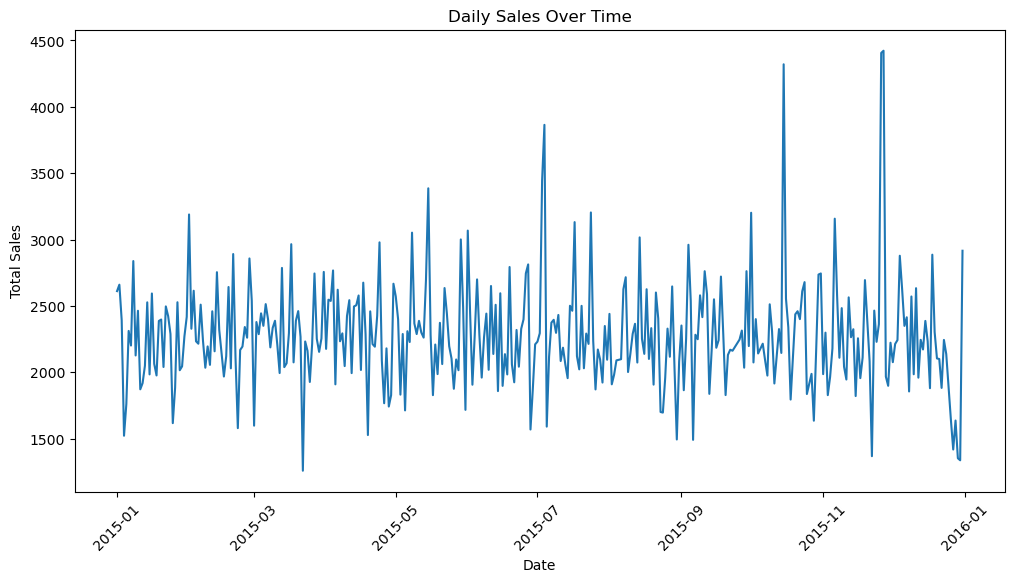

In [15]:
# Group by order_date and sum total_price
daily_sales = df.groupby('order_date')['total_price'].sum().reset_index()

# Plot daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['order_date'], daily_sales['total_price'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [29]:
# Extracting relevant date features
df['day_of_week'] = df['order_date'].dt.day_name()  # Day of the week
df['month'] = df['order_date'].dt.month  # Month
df['year'] = df['order_date'].dt.year  # Year
df['day'] = df['order_date'].dt.day  # Day of the month


In [31]:
import numpy as np

# Define a list of holiday dates
holidays = pd.to_datetime(['2015-12-25'])  # Example holidays
df['is_holiday'] = np.where(df['order_date'].isin(holidays), 1, 0)


In [33]:
# One-hot encoding for categorical features
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode day_of_week and month
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['month'] = label_encoder.fit_transform(df['month'])



In [35]:
# Check the updated DataFrame with new features
print(df.head())


   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25     MEDIUM        Classic   
1       16.00        16.00     MEDIUM        Classic   
2       18.50        18.50      LARGE         Veggie   
3       20.75        20.75      LARGE        Supreme   
4       16.00        16.00     MEDIUM         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal

In [37]:
df.to_csv('cleaned_pizza1.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('D:/project 5/Cleaned_Pizza_ingredients.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,the barbecue chicken pizza,barbecued chicken,40.0
1,bbq_ckn_l,the barbecue chicken pizza,red peppers,15.0
2,bbq_ckn_l,the barbecue chicken pizza,green peppers,20.0
3,bbq_ckn_l,the barbecue chicken pizza,tomatoes,30.0
4,bbq_ckn_l,the barbecue chicken pizza,red onions,60.0


In [41]:
# Check for duplicate entries
duplicates = df.duplicated(subset=['pizza_name_id', 'pizza_name'], keep=False)
print(f"Number of duplicates: {duplicates.sum()}")


Number of duplicates: 518


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# If there were any missing values, you could fill them or drop them
# df_cleaned = df_cleaned.dropna()  # To drop
# df_cleaned = df_cleaned.fillna(value)  # To fill


pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64


In [9]:
# Standardizing ingredient names to lowercase
df['pizza_ingredients'] = df['pizza_ingredients'].str.lower()


In [11]:
df.to_csv('cleaned_ingredients1.csv', index=False)

In [13]:
import pandas as pd

# Assuming the DataFrame is named df
df = pd.read_csv('C:/Users/Siva/cleaned_ingredients1.csv')
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Items_Qty_In_Grams'].quantile(0.25)
Q3 = df['Items_Qty_In_Grams'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_cleaned = df[(df['Items_Qty_In_Grams'] >= lower_bound) & (df['Items_Qty_In_Grams'] <= upper_bound)]

# Display the cleaned DataFrame
print(df_cleaned)


    pizza_name_id                         pizza_name  pizza_ingredients  \
0       bbq_ckn_l         the barbecue chicken pizza  barbecued chicken   
1       bbq_ckn_l         the barbecue chicken pizza        red peppers   
2       bbq_ckn_l         the barbecue chicken pizza      green peppers   
3       bbq_ckn_l         the barbecue chicken pizza           tomatoes   
4       bbq_ckn_l         the barbecue chicken pizza         red onions   
..            ...                                ...                ...   
513  veggie_veg_s  the vegetables + vegetables pizza      green peppers   
514  veggie_veg_s  the vegetables + vegetables pizza         red onions   
515  veggie_veg_s  the vegetables + vegetables pizza           zucchini   
516  veggie_veg_s  the vegetables + vegetables pizza            spinach   
517  veggie_veg_s  the vegetables + vegetables pizza             garlic   

     Items_Qty_In_Grams  
0                  40.0  
1                  15.0  
2                  20

In [15]:
df_cleaned.to_csv('D:/project 5/new/cleaned_ingredients.csv', index=False)

In [17]:
import pandas as pd

# Sample DataFrame creation (replace this with your actual DataFrame)
data = pd.read_csv('C:/Users/Siva/cleaned_pizza1.csv')

df = pd.DataFrame(data)

# Calculate Q1 and Q3
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_cleaned = df[(df['quantity'] >= lower_bound) & (df['quantity'] <= upper_bound)]

# Display the cleaned DataFrame
print(df_cleaned)


       pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1  2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1  2015-01-01   11:57:40   
2             3         2  five_cheese_l         1  2015-01-01   11:57:40   
3             4         2    ital_supr_l         1  2015-01-01   11:57:40   
4             5         2     mexicana_m         1  2015-01-01   11:57:40   
...         ...       ...            ...       ...         ...        ...   
48549     48616     21348  ckn_alfredo_m         1  2015-12-31   21:23:10   
48550     48617     21348  four_cheese_l         1  2015-12-31   21:23:10   
48551     48618     21348   napolitana_s         1  2015-12-31   21:23:10   
48552     48619     21349     mexicana_l         1  2015-12-31   22:09:54   
48553     48620     21350      bbq_ckn_s         1  2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.

In [19]:
df_cleaned.to_csv('D:/project 5/new/cleaned_pizza.csv', index=False)